# Objective:
Blood Transfusion Service Center Data Set :

Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan
This is a classification problem.
To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

# Importing dataset

In [122]:
import pandas as pd # Dataframe
import numpy as np # maths

################ Machine Learning #######################
from sklearn import preprocessing # Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

################ Data visualization #######################
import matplotlib.pyplot as plt # Plot 
plt.rc("font", size=14)
import seaborn as sns # Plot advanced version of matplotlib
import plotly
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [122]:
import pandas as pd # Dataframe
import numpy as np # maths

################ Machine Learning #######################
from sklearn import preprocessing # Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

################ Data visualization #######################
import matplotlib.pyplot as plt # Plot 
plt.rc("font", size=14)
import seaborn as sns # Plot advanced version of matplotlib
import plotly
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [123]:
import pandas as pd
data = pd.read_csv (r"C:\Users\suvar\Desktop\Longistic regrassion\transfusion.csv")

#first few rows
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [124]:
data.columns=['Recencymonths','Frequencytimes','Monetaryccblood','Timemonths','donatedbloodinMarch']
data.columns

Index(['Recencymonths', 'Frequencytimes', 'Monetaryccblood', 'Timemonths',
       'donatedbloodinMarch'],
      dtype='object')

# Data Structure or type 

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Recencymonths        748 non-null    int64
 1   Frequencytimes       748 non-null    int64
 2   Monetaryccblood      748 non-null    int64
 3   Timemonths           748 non-null    int64
 4   donatedbloodinMarch  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [126]:
data.isnull().sum()

Recencymonths          0
Frequencytimes         0
Monetaryccblood        0
Timemonths             0
donatedbloodinMarch    0
dtype: int64

### EDA : Data Pre-Processing
#### Assign Lables to  Categorical data 

In [127]:
data.donatedbloodinMarch.value_counts()

0    570
1    178
Name: donatedbloodinMarch, dtype: int64

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Recencymonths        748 non-null    int64
 1   Frequencytimes       748 non-null    int64
 2   Monetaryccblood      748 non-null    int64
 3   Timemonths           748 non-null    int64
 4   donatedbloodinMarch  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [129]:
data.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [130]:
data.donatedbloodinMarch.value_counts()

0    570
1    178
Name: donatedbloodinMarch, dtype: int64

In [131]:
(3/10000)*100 

0.03

<AxesSubplot:xlabel='donatedbloodinMarch', ylabel='count'>

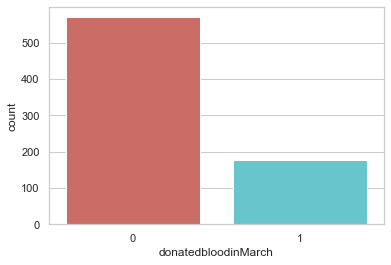

In [132]:
sns.countplot(x='donatedbloodinMarch',data=data,palette='hls')

In [133]:
data.groupby('donatedbloodinMarch').mean()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths
donatedbloodinMarch,,,,
0,10.771930,4.801754,1200.438596,34.770175
1,5.455056,7.797753,1949.438202,32.719101


# Visualizations

Text(0, 0.5, 'Frequency')

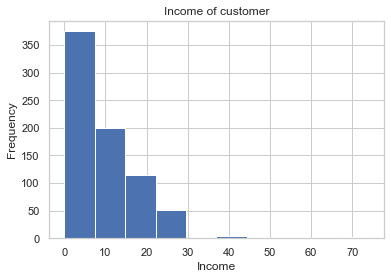

In [134]:
data.Recencymonths.hist()
plt.title('Income of customer')
plt.xlabel('Income')
plt.ylabel('Frequency')
#plt.savefig('Income_age')

Text(0, 0.5, 'Frequency')

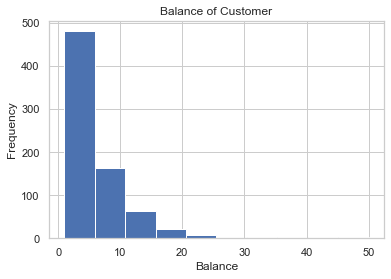

In [135]:
data.Frequencytimes.hist()
plt.title('Balance of Customer')
plt.xlabel('Balance')
plt.ylabel('Frequency')
#plt.savefig('Balance_age')

# Identify & Treatment of Outlier 

<AxesSubplot:ylabel='Recencymonths'>

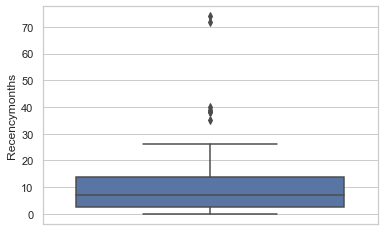

In [136]:
sns.boxplot(y='Recencymonths',data=data)  # Single Variable

In [137]:
q1 = data['Recencymonths'].quantile(0.25)
q3 = data['Recencymonths'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

30.875

In [138]:
data['Recencymonths']=np.where(data['Recencymonths'] > upper_limit,upper_limit,data['Recencymonths']) 


<AxesSubplot:ylabel='Recencymonths'>

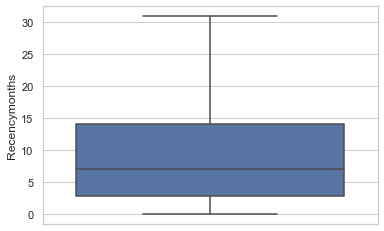

In [139]:
sns.boxplot(y='Recencymonths',data=data)  # Single Variable

<AxesSubplot:ylabel='Frequencytimes'>

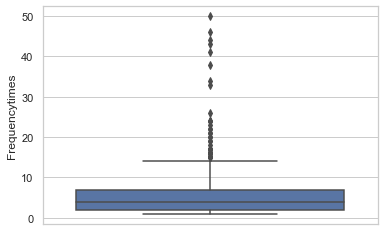

In [140]:
sns.boxplot(y='Frequencytimes',data=data)  # Single Variable

In [141]:
q1 = data['Frequencytimes'].quantile(0.25)
q3 = data['Frequencytimes'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

14.5

In [142]:
data['Frequencytimes']=np.where(data['Frequencytimes'] > upper_limit,upper_limit,data['Frequencytimes']) 


<AxesSubplot:ylabel='Frequencytimes'>

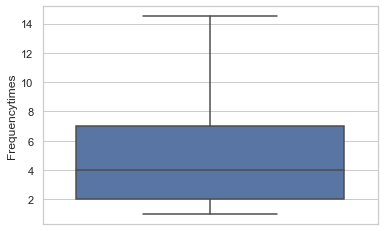

In [143]:
sns.boxplot(y='Frequencytimes',data=data)  # Single Variable

<AxesSubplot:ylabel='Monetaryccblood'>

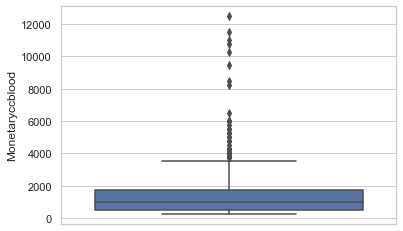

In [144]:
sns.boxplot(y='Monetaryccblood',data=data)  # Single Variable

In [145]:
q1 = data['Monetaryccblood'].quantile(0.25)
q3 = data['Monetaryccblood'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

3625.0

In [146]:
data['Monetaryccblood']=np.where(data['Monetaryccblood'] > upper_limit,upper_limit,data['Monetaryccblood']) 


<AxesSubplot:ylabel='Monetaryccblood'>

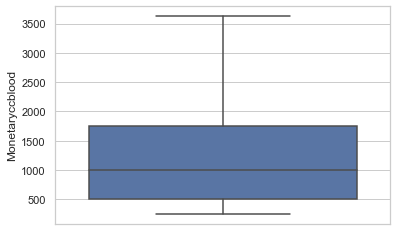

In [147]:
sns.boxplot(y='Monetaryccblood',data=data)  # Single Variable

<AxesSubplot:ylabel='Timemonths'>

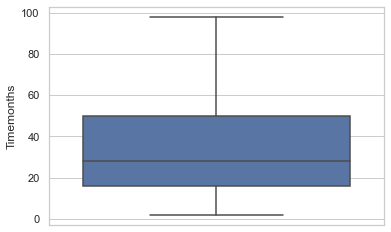

In [148]:
sns.boxplot(y='Timemonths',data=data)  # Single Variable

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [149]:
data_final=data

In [150]:
data_final.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
0,2.0,14.5,3625.0,98,1
1,0.0,13.0,3250.0,28,1
2,1.0,14.5,3625.0,35,1
3,2.0,14.5,3625.0,45,1
4,1.0,14.5,3625.0,77,0


In [151]:
# define our input variable (X) & output variable
X = data_final.drop('donatedbloodinMarch', axis = 1)
Y = data_final[['donatedbloodinMarch']]
# Split X and y into X_
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.30, random_state=123)

# Step 4 : Performing Logistic Regression


In [152]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
240,8.0,8.0,2000.0,52,1
100,4.0,8.0,2000.0,34,1
625,7.0,5.0,1250.0,35,0
273,4.0,5.0,1250.0,58,0
349,11.0,1.0,250.0,11,0


# Hypothesis

* H0 :- There is no log linear relationship between donatedbloodinMarch and Recencymonths , Frequencytimes & Frequencytimes,Timemonths

Vs 

* H1 :- There is log linear relationship between donatedbloodinMarch and Recencymonths , Frequencytimes & Frequencytimes,Timemonths


Alpha = 0.05

In [154]:
import statsmodels.formula.api as smf
result=smf.logit("donatedbloodinMarch~Recencymonths+Frequencytimes+Monetaryccblood+Timemonths",data=train).fit()
result.summary2()

         Current function value: 0.439216
         Iterations: 35


C:\Users\suvar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:              Logit               Pseudo R-squared: 0.177     
Dependent Variable: donatedbloodinMarch AIC:              469.4200  
Date:               2022-11-23 20:40    BIC:              490.7179  
No. Observations:   523                 Log-Likelihood:   -229.71   
Df Model:           4                   LL-Null:          -279.25   
Df Residuals:       518                 LLR p-value:      1.5501e-20
Converged:          0.0000              Scale:            1.0000    
No. Iterations:     35.0000                                         
---------------------------------------------------------------------
                  Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------------
Intercept        -0.5692    0.2418  -2.3535  0.0186  -1.0431  -0.0952
Recencymonths    -0.1049    0.0220  -4.7712  0.0000  -0.1480  -0.0618
Frequencytimes    0.0000       nan      nan     nan      nan      nan
Monetaryccblood   0.0009       nan      nan     nan      nan      nan
Timemonths       -0.0357    0.0082  -4.3747  0.0000  -0.0517  -0.0197
====================================================================

"""

In [155]:
model=smf.logit("donatedbloodinMarch~Recencymonths+Timemonths",data=train).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.469654
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:              Logit               Pseudo R-squared: 0.120     
Dependent Variable: donatedbloodinMarch AIC:              497.2585  
Date:               2022-11-23 20:41    BIC:              510.0373  
No. Observations:   523                 Log-Likelihood:   -245.63   
Df Model:           2                   LL-Null:          -279.25   
Df Residuals:       520                 LLR p-value:      2.5143e-15
Converged:          1.0000              Scale:            1.0000    
No. Iterations:     6.0000                                          
---------------------------------------------------------------------
                  Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------------
Intercept        -0.0092    0.2164  -0.0423  0.9662  -0.4332   0.4149
Recencymonths    -0.1421    0.0208  -6.8423  0.0000  -0.1827  -0.1014
Timemonths       -0.0032    0.0046  -0.6890  0.4908  -0.0121   0.0058
====================================================================

"""

In [157]:
import statsmodels.formula.api as smf
result=smf.logit("donatedbloodinMarch~Recencymonths",data=train).fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.470113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:              Logit               Pseudo R-squared: 0.120     
Dependent Variable: donatedbloodinMarch AIC:              495.7379  
Date:               2022-11-23 20:44    BIC:              504.2571  
No. Observations:   523                 Log-Likelihood:   -245.87   
Df Model:           1                   LL-Null:          -279.25   
Df Residuals:       521                 LLR p-value:      3.0756e-16
Converged:          1.0000              Scale:            1.0000    
No. Iterations:     6.0000                                          
---------------------------------------------------------------------
                  Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------------
Intercept        -0.1028    0.1690  -0.6079  0.5432  -0.4341   0.2285
Recencymonths    -0.1436    0.0207  -6.9484  0.0000  -0.1841  -0.1031
====================================================================

"""

* We Reject Ho

### Conclusion :- 

There is log linear relationship between  Recencymonths


# Odds Ratio

In [158]:
model.params

Intercept       -0.009161
Recencymonths   -0.142055
Timemonths      -0.003150
dtype: float64

In [159]:
Model_Odds=pd.DataFrame(np.exp(model.params),columns=["Odds_Ratio"])
Model_Odds

,Odds_Ratio
Intercept,0.990881
Recencymonths,0.867574
Timemonths,0.996855


* doneted blood have 0.8675 times higher odds of not donet a blood as compared to denote a blood  

# Step 6 : Predictions on Train Dataset

In [160]:
train.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
240,8.0,8.0,2000.0,52,1
100,4.0,8.0,2000.0,34,1
625,7.0,5.0,1250.0,35,0
273,4.0,5.0,1250.0,58,0
349,11.0,1.0,250.0,11,0


In [161]:
train['Probability']=model.predict(train)
train.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch,Probability
240,8.0,8.0,2000.0,52,1,0.212587
100,4.0,8.0,2000.0,34,1,0.335262
625,7.0,5.0,1250.0,35,0,0.247164
273,4.0,5.0,1250.0,58,0,0.318629
349,11.0,1.0,250.0,11,0,0.167087


In [162]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0)  #thershold  >0.7
train.sort_values(by='Predicted',ascending=False).head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch,Probability,Predicted
240,8.0,8.0,2000.0,52,1,0.212587,0
675,16.0,3.0,750.0,23,0,0.086710,0
503,2.0,14.5,3625.0,98,0,0.353893,0
731,14.0,3.0,750.0,79,0,0.095628,0
574,2.0,2.0,500.0,11,1,0.418747,0


# Step 7 : Model Performance Metrics

In [163]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'],train['donatedbloodinMarch'])
print(matrix)

[[405 118]
 [  0   0]]


In [164]:
Accuracy_Train=((405+0)/(527)*100)
print(Accuracy_Train)

76.85009487666035


* Accuracy of Model is 76% , So we say Good Model 

In [165]:
from sklearn.metrics import classification_report
print(classification_report(train['donatedbloodinMarch'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       405
           1       0.00      0.00      0.00       118

    accuracy                           0.77       523
   macro avg       0.39      0.50      0.44       523
weighted avg       0.60      0.77      0.68       523



* Accuracy of Bad Customer Capture by Model is 00% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 100% ( specificity) 
* Accuracy of Predicted Good Customer And often Correct is 77% 


# Step 8 : Predictions on Test Dataset


In [166]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
138,9.0,5.0,1250.0,19,0
511,2.0,11.0,2750.0,26,0
427,14.0,5.0,1250.0,74,0
161,2.0,1.0,250.0,2,0
307,11.0,3.0,750.0,23,0


In [167]:
test['Probability']=model.predict(test)
test.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch,Probability
138,9.0,5.0,1250.0,19,0,0.206279
511,2.0,11.0,2750.0,26,0,0.407292
427,14.0,5.0,1250.0,74,0,0.096999
161,2.0,1.0,250.0,2,0,0.425663
307,11.0,3.0,750.0,23,0,0.161893


In [168]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch,Probability,Predicted
138,9.0,5.0,1250.0,19,0,0.206279,0
511,2.0,11.0,2750.0,26,0,0.407292,0
427,14.0,5.0,1250.0,74,0,0.096999,0
161,2.0,1.0,250.0,2,0,0.425663,0
307,11.0,3.0,750.0,23,0,0.161893,0


# Step 9 : Model Performance Metrics on Test data 

In [169]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['donatedbloodinMarch'])
print(matrix)

[[165  60]
 [  0   0]]


In [170]:
Accuracy_test=((165+0)/(225)*100)
Accuracy_test

73.33333333333333

* Accuracy of Model Performance on Test data is 73% , So we say Good Model Performance 

In [171]:
from sklearn.metrics import classification_report
print(classification_report(test['donatedbloodinMarch'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       165
           1       0.00      0.00      0.00        60

    accuracy                           0.73       225
   macro avg       0.37      0.50      0.42       225
weighted avg       0.54      0.73      0.62       225



* Accuracy of Bad Customer Capture by Model is 00% 
* Accuracy of Good Customer Capture by Model is 100% 
* Accuracy of Predicted Good Customer And often Correct is 60% 


In [172]:
model.params

Intercept       -0.009161
Recencymonths   -0.142055
Timemonths      -0.003150
dtype: float64

In [173]:
train.sort_values(by='Predicted',ascending=False,inplace=True)

train.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch,Probability,Predicted
240,8.0,8.0,2000.0,52,1,0.212587,0
675,16.0,3.0,750.0,23,0,0.086710,0
503,2.0,14.5,3625.0,98,0,0.353893,0
731,14.0,3.0,750.0,79,0,0.095628,0
574,2.0,2.0,500.0,11,1,0.418747,0


# Finish 